In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
session.query(Measurement.date).filter(Measurement.date == "2016-08-23").first()
# Perform a query to retrieve the data and precipitation scores
past_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23").order_by(Measurement.date).all()
#past_year

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
past_year_df = pd.DataFrame(past_year)
past_year_df.set_index("date", inplace = True)
past_year_df = past_year_df.dropna()
past_year_df
past_year_df.head(10)
# Sort the dataframe by date
#"This was done during my query search. The dataframe is sorted in ascending order from 2016-08-23."

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


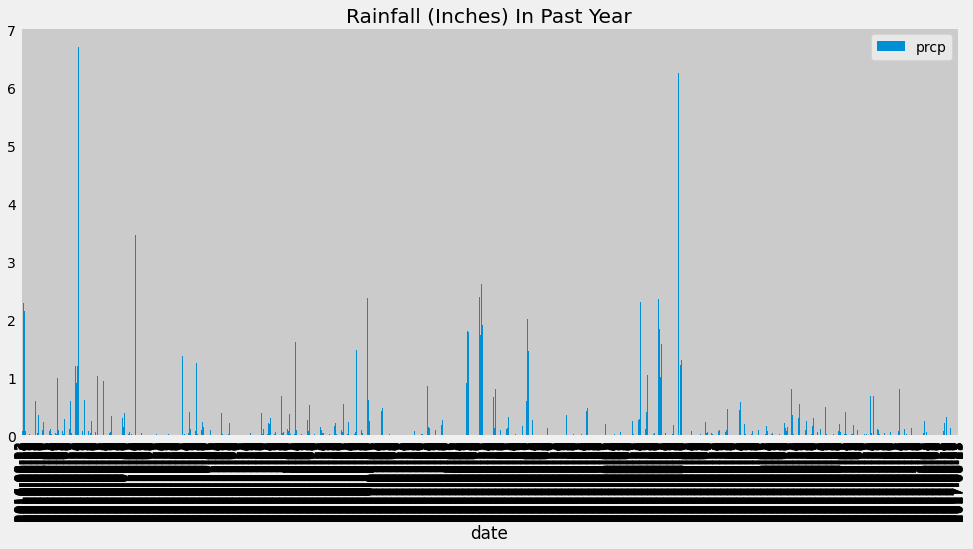

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
past_year_df.plot(kind='bar',title="Rainfall (Inches) In Past Year", figsize = (16,8), grid=True, legend=True)


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
past_year_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'USC00519281 minimum temperature = {station_min}')
station_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'USC00519281 maximum temperature = {station_max}')
station_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f'USC00519281 average temperature = {station_avg}')

USC00519281 minimum temperature = [(54.0,)]
USC00519281 maximum temperature = [(85.0,)]
USC00519281 average temperature = [(71.66378066378067,)]


In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23").all()

df = pd.DataFrame(most_active)
df.set_index("date", inplace = True)
df = df.dropna()

df.head(10)

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0


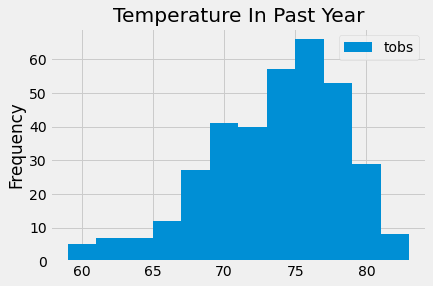

In [31]:
#Historgram for temperature at the most active station
df.plot(kind='hist',title="Temperature In Past Year", bins=12, grid=True,legend=True)


# Close session

In [ ]:
# Close Session
session.close()